In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from gene_inference import filterEdgeListByGene, data_loader, GCNInferenceNetwork, train, validate

In [2]:
HOME = '/home/jupyter-dylan/'    # Dylan
devices = torch.device('cuda')

## Load data

In [3]:
# load gene names
#gene_name = np.loadtxt('gene_name.txt', dtype=str)     # Jiayu
gene_name = np.concatenate(                            # Dylan
    [np.loadtxt('{}gene labels/input_genes.txt'.format(HOME), dtype=str),
    np.loadtxt('{}gene labels/output_genes-1.txt'.format(HOME), dtype=str)]
)

# gene_edge = np.loadtxt('genemania_edge.txt', dtype=str)   # Jiayu
with open('genemania_edges.csv', newline='') as f:         # Dylan
    reader = csv.reader(f)
    gene_edge = list(reader)

In [4]:
# create mapping table from genes to nodes number
node_map = {}
for i, j in enumerate(gene_name):
    node_map.update({j:i})

In [5]:
gene_set = set(["App", "Apoe", "Gusb","Lamp5","Mbp","Pvalb","S100b","Slc30a3","Snca","Mapt"])

In [6]:
edge_list = filterEdgeListByGene('Gusb', gene_edge, gene_set, node_map)
edge_list = torch.tensor(edge_list, dtype=torch.long).t()
edge_list.size()

could not find genes in edge Obox1/Obox7
could not find genes in edge Obox6/Obox7
could not find genes in edge Obox5/Obox7
could not find genes in edge Pou4f2/Obox7
could not find genes in edge Obox3/Obox7
could not find genes in edge Gsc2/Obox7
could not find genes in edge Rhox13/Obox7
could not find genes in edge Zfhx2/Obox7
could not find genes in edge Zfp729a/Gm4924
could not find genes in edge Zfp729a/Etohi1
could not find genes in edge Zfp729a/Gm13212
could not find genes in edge Zfp729a/Gm14322
could not find genes in edge Zfp729a/Gm14391
could not find genes in edge Zfp729a/Gm14325
could not find genes in edge Zfp729a/Zfp600
could not find genes in edge Zfp729a/Gm3854
could not find genes in edge Zfp729a/Zfp382
could not find genes in edge Zfp729a/Rslcan18
could not find genes in edge Zfp729a/Zfp735
could not find genes in edge Zfp729a/Zfp616
could not find genes in edge Zfp729a/Zfp882
could not find genes in edge Zfp729a/D3Ertd254e
could not find genes in edge Zfp729a/Zfp383
c

could not find genes in edge Rxrb/Efl1
could not find genes in edge Cebpg/Paxbp1
could not find genes in edge Cebpg/Mterf3
could not find genes in edge Cebpg/Pspc1
could not find genes in edge Cebpg/Rai1
could not find genes in edge Cebpg/Ndnl2
could not find genes in edge Cebpg/Cebpz
could not find genes in edge Cebpg/Sfpq
could not find genes in edge Cebpg/Zfp281
could not find genes in edge Cebpg/Tcerg1
could not find genes in edge Id1/Nr4a2
could not find genes in edge Id1/Foxf1
could not find genes in edge Id1/Foxc2
could not find genes in edge Id1/Mnt
could not find genes in edge Id1/Hes1
could not find genes in edge Id1/Tfam
could not find genes in edge Id1/Smad7
could not find genes in edge Id1/Klf10
could not find genes in edge Id1/Nab2
could not find genes in edge Id1/Jun
could not find genes in edge Id1/Cebpb
could not find genes in edge Id1/Zfp36
could not find genes in edge Hand1/Cdx4
could not find genes in edge Hand1/Mef2b
could not find genes in edge Hand1/Ascl1
could n

could not find genes in edge Plagl1/Elk3
could not find genes in edge Plagl1/Foxf2
could not find genes in edge Plagl1/Zfp146
could not find genes in edge Plagl1/Zfp932
could not find genes in edge Plagl1/Tmpo
could not find genes in edge Plagl1/Epas1
could not find genes in edge Mxd1/Foxk1
could not find genes in edge Mxd1/Zfp422
could not find genes in edge Nhlh1/Tfap2b
could not find genes in edge Nhlh1/Myrf
could not find genes in edge Nhlh1/Npas1
could not find genes in edge Gtf2ird2/Mef2d
could not find genes in edge Gtf2ird2/Sin3a
could not find genes in edge Gtf2ird2/Nr2f6
could not find genes in edge Zfp729a/Zfp58
could not find genes in edge Zfp729b/Zfp955b
could not find genes in edge Gpbp1/Zfp729a
could not find genes in edge Zfp566/Zfp729a
could not find genes in edge Zfp566/Zfp729b
could not find genes in edge Zfp24/Zfp74
could not find genes in edge Zfp24/Zbtb41
could not find genes in edge Zfp24/2610008E11Rik
could not find genes in edge Zfp280c/Zfp729a
could not find g

could not find genes in edge Eya1/Hoxc6
could not find genes in edge Eya1/Six4
could not find genes in edge Eya1/Hoxa9
could not find genes in edge Eya1/Pitx2
could not find genes in edge Eya1/Hoxa10
could not find genes in edge Eya1/Tbx15
could not find genes in edge Eya1/Maf
could not find genes in edge Eya1/Pou3f4
could not find genes in edge Eya1/Lhx3
could not find genes in edge Eya1/Pbx1
could not find genes in edge Eya1/Foxd1
could not find genes in edge Eya1/Mitf
could not find genes in edge Eya1/Hoxa2
could not find genes in edge Eya1/Ncoa1
could not find genes in edge Eya1/Msx1
could not find genes in edge Eya1/Lhx1
could not find genes in edge Eya1/Hoxb9
could not find genes in edge Eya1/Dlx2
could not find genes in edge Eya1/Pitx1
could not find genes in edge Eya1/Esr2
could not find genes in edge Eya1/Rax
could not find genes in edge Eya1/Six5
could not find genes in edge Eya1/Thrb
could not find genes in edge Eya1/Hoxa1
could not find genes in edge Eya1/Six1
could not fin

could not find genes in edge Id1/Mapt
could not find genes in edge Id1/Snai2
could not find genes in edge Id1/Snai1
could not find genes in edge Id1/Rela
could not find genes in edge Id1/Shh
could not find genes in edge Id1/Taf10
could not find genes in edge Id1/Irf8
could not find genes in edge Id1/E4f1
could not find genes in edge Id1/Ldb1
could not find genes in edge Id1/Stat1
could not find genes in edge Id1/Hr
could not find genes in edge Id1/Rbl2
could not find genes in edge Id1/Kmt2a
could not find genes in edge Id1/Elf5
could not find genes in edge Id1/Lmo2
could not find genes in edge Id1/Stat6
could not find genes in edge Id1/Nanog
could not find genes in edge Id1/Smad4
could not find genes in edge Id1/Cdk2
could not find genes in edge Id1/Smad6
could not find genes in edge Id1/Smad2
could not find genes in edge Id1/Deaf1
could not find genes in edge Id1/Ybx1
could not find genes in edge Id1/Hnf1a
could not find genes in edge Id1/Carm1
could not find genes in edge Id1/Acvr2b


could not find genes in edge Tcf21/Spi1
could not find genes in edge Tcf21/Pou2f3
could not find genes in edge Tcf21/Snai2
could not find genes in edge Tcf21/Snai1
could not find genes in edge Tcf21/Rela
could not find genes in edge Tcf21/Shh
could not find genes in edge Tcf21/Irf8
could not find genes in edge Tcf21/E4f1
could not find genes in edge Tcf21/Ldb1
could not find genes in edge Tcf21/Stat1
could not find genes in edge Tcf21/Hr
could not find genes in edge Tcf21/Rbl2
could not find genes in edge Tcf21/Kmt2a
could not find genes in edge Tcf21/Elf5
could not find genes in edge Tcf21/Lmo2
could not find genes in edge Tcf21/Stat6
could not find genes in edge Tcf21/Smad4
could not find genes in edge Tcf21/Cdk2
could not find genes in edge Tcf21/Smad6
could not find genes in edge Tcf21/Smad2
could not find genes in edge Tcf21/Deaf1
could not find genes in edge Tcf21/Ybx1
could not find genes in edge Tcf21/Hnf1a
could not find genes in edge Tcf21/Acvr2b
could not find genes in edge 

could not find genes in edge Gli1/Ovol2
could not find genes in edge Gli1/Zfp64
could not find genes in edge Gli1/Zfp13
could not find genes in edge Gli1/Patz1
could not find genes in edge Gli1/Prdm16
could not find genes in edge Gli1/Zfp426
could not find genes in edge Gli1/Zfp280c
could not find genes in edge Gli1/Zfp647
could not find genes in edge Gli1/Zfp219
could not find genes in edge Gli1/Zfp473
could not find genes in edge Gli1/Ikzf3
could not find genes in edge Gli1/Prdm4
could not find genes in edge Gli1/Sall2
could not find genes in edge Gli1/Zfp60
could not find genes in edge Gli1/Zfp93
could not find genes in edge Gli1/Zfp59
could not find genes in edge Gli1/Zfp54
could not find genes in edge Gli1/Zbtb32
could not find genes in edge Gli1/Zkscan5
could not find genes in edge Gli1/Bcl11b
could not find genes in edge Gli1/Zfp14
could not find genes in edge Gli1/Zfp30
could not find genes in edge Gli1/Zfhx3
could not find genes in edge Gli1/Zfp37
could not find genes in edge 

torch.Size([2, 488146])

In [7]:
pd.read_csv('{}new_data/output_train-1.csv'.format(HOME), header=0, index_col=0, nrows=5)

,Apoe,App,Gusb,Lamp5,Mapt,Mbp,Pvalb,S100b,Slc30a3,Snca
F2S4_150422_002_A01,0.000000e+00,0.001644,0.000006,9.264255e-04,0.000284,0.000062,0.000008,0.000006,0.000041,0.000622
F2S4_150422_002_C01,0.000000e+00,0.001379,0.000000,8.858753e-07,0.000369,0.000168,0.000000,0.000000,0.000215,0.000865
F2S4_150422_002_E01,0.000000e+00,0.001922,0.000000,0.000000e+00,0.000416,0.000036,0.000000,0.000000,0.000326,0.001063
F2S4_150422_002_F01,0.000000e+00,0.002026,0.000019,0.000000e+00,0.000213,0.000140,0.000000,0.000000,0.000253,0.000736
F2S4_150422_002_G01,9.879929e-07,0.002386,0.000004,1.877187e-05,0.000183,0.000069,0.000000,0.000004,0.000510,0.000668


In [8]:
# load training data
#train_loader = data_loader('input_train_cat.csv', gene='gusb', node_map=node_map,    # Jiayu
#                           edge_list=edge_list, multiplier=1e-5)
train_loader = data_loader('{}new_data/input_train.csv'.format(HOME), gene='Gusb', node_map=node_map,    # Dylan
                           edge_list=edge_list, multiplier=1, cat='{}new_data/output_train-1.csv'.format(HOME))

# load validation data
#validate_loader = data_loader('input_test_cat.csv', gene='gusb', node_map=node_map,  # Jiayu
#                              edge_list=edge_list, multiplier=1e-5)
validate_loader = data_loader('{}new_data/input_test.csv'.format(HOME), gene='Gusb', node_map=node_map,  # Dylan
                              edge_list=edge_list, multiplier=1, cat='{}new_data/output_test-1.csv'.format(HOME))

In [9]:
print(len(train_loader))
print(len(validate_loader))

18542
4636


In [10]:
print(train_loader[0].x.size())
print(train_loader[0].y.size())
print(train_loader[0].edge_index.size())

torch.Size([1431, 1])
torch.Size([1, 1])
torch.Size([2, 488146])


## Train GCN

In [11]:
model = GCNInferenceNetwork().to(torch.device('cuda'))
train_loss_lis = []
validate_loss_lis = []
train_batch_size = 64
validate_batch_size = 64
epochs = 100

for i in range(epochs): 
    
    train_loss = train(model, train_loader, train_batch_size)
    train_loss_lis.append(train_loss)
    
    val_loss = validate(model, validate_loader, validate_batch_size)
    validate_loss_lis.append(val_loss)
    
    # print ('epochs: %d || train_losses: %f || train_mse: %f || val_loss: %f || val_mse: %f' \
          # %(i, train_loss, train_mse, val_loss, val_mse))
    # print ('epochs: %d || train_losses: %f' %(i, train_loss))

  0%|          | 1/289 [00:00<03:29,  1.37it/s, loss=4.88e-10]

KeyboardInterrupt: 

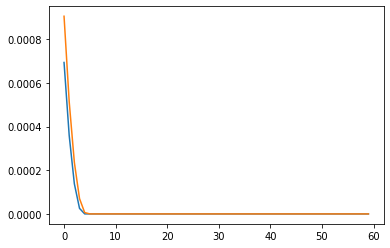

In [16]:
# ep = [i for i in range(20)]
plt.plot(range(len(validate_loss_lis)), validate_loss_lis)
plt.plot(range(len(train_loss_lis)), train_loss_lis)